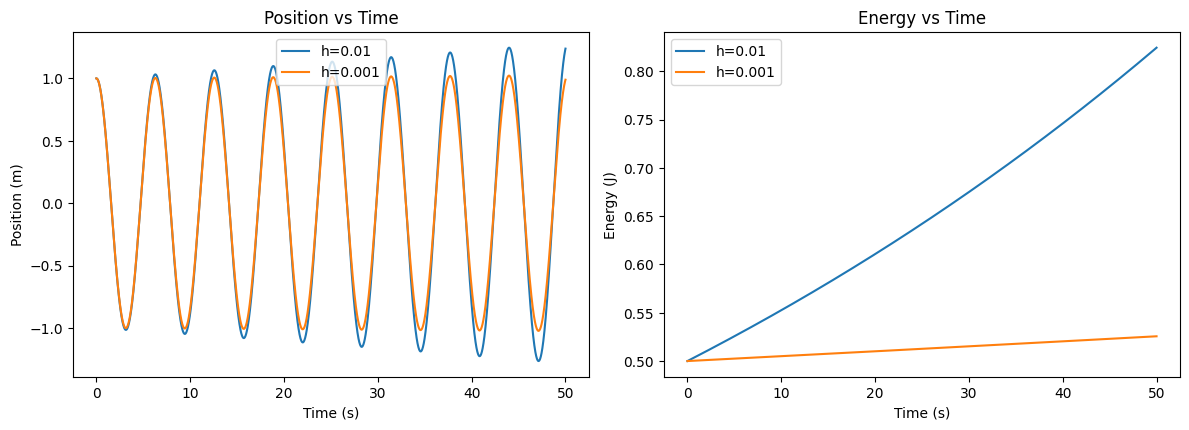

In [1]:
# 导入绘图库
import matplotlib.pyplot as plt


def euler_method(x_0, v_0, N):
    """
    使用显式欧拉法求解简谐运动微分方程
    参数：
    x_0 : 初始位置
    v_0 : 初始速度
    N   : 总时间步数

    返回：
    x_list : 位置历史记录
    v_list : 速度历史记录
    t_list : 时间节点记录
    E_list : 机械能历史记录
    """
    h = 50 / N  # 计算步长（总时长50秒）
    # 初始化变量
    x = x_0
    v = v_0
    E = 0.5 * (x**2 + v**2)  # 机械能（动能+势能）
    t = 0

    # 创建数据记录列表
    x_list = []
    v_list = []
    t_list = []
    E_list = []

    # 显式欧拉法迭代
    for _ in range(N + 1):
        # 记录当前状态
        x_list.append(x)
        v_list.append(v)
        E_list.append(E)
        t_list.append(t)

        # 显式欧拉法更新（注意这里更新顺序会影响结果）
        x_new = x + h * v  # 用当前速度更新位置
        v_new = v - h * x  # 用当前位置更新速度（注意这里用的是旧位置x）
        # 注意：这里应该使用旧位置x还是新位置x_new存在争议，这是显式欧拉法的实现特点

        # 更新变量
        x = x_new
        v = v_new
        E = 0.5 * (x**2 + v**2)  # 计算新的机械能
        t += h

    return x_list, v_list, t_list, E_list


# 主程序
if __name__ == "__main__":
    # 初始条件设置
    x_0 = 1.0  # 初始位置（振幅）
    v_0 = 0.0  # 初始速度（从最大位移处释放）

    # 两种不同步长的计算
    N1 = 5000  # 步数1（对应步长h=0.01）
    N2 = 50000  # 步数2（对应步长h=0.001）

    # 执行计算
    x_list1, v_list1, t_list1, E_list1 = euler_method(x_0, v_0, N1)
    x_list2, v_list2, t_list2, E_list2 = euler_method(x_0, v_0, N2)

    # 绘制结果
    plt.figure(figsize=(12, 8))

    # 位置-时间图
    plt.subplot(2, 2, 1)
    plt.plot(t_list1, x_list1, label="h=0.01")
    plt.plot(t_list2, x_list2, label="h=0.001")
    plt.title("Position vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend()

    # 能量-时间图
    plt.subplot(2, 2, 2)
    plt.plot(t_list1, E_list1, label="h=0.01")
    plt.plot(t_list2, E_list2, label="h=0.001")
    plt.title("Energy vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.legend()

    plt.tight_layout()  # 自动调整子图间距
    plt.show()